In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
titanic = pd.read_csv('C:/Users/mayan/Downloads/titanic (1).csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [75]:
titanic.info()
titanic.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887,887,887.000000,887.000000,887.000000,887.00000
unique,NaN,NaN,887,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Mr. Owen Harris Braund,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,573,NaN,NaN,NaN,NaN
mean,0.385569,2.305524,NaN,NaN,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,NaN,NaN,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,NaN,NaN,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.13750


In [77]:
titanic.rename(columns={
    'Siblings/Spouses Aboard': 'SibSp',
    'Parents/Children Aboard': 'Parch'
}, inplace=True)

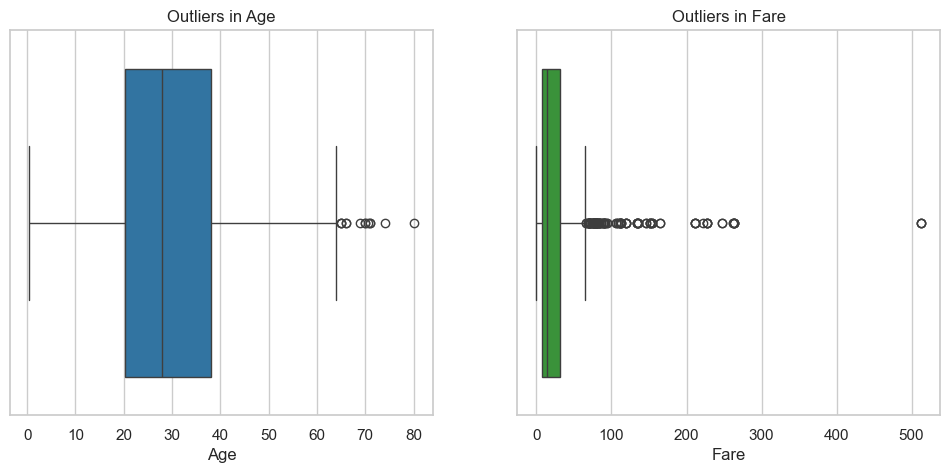

In [79]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=titanic['Age'],color='#1f77b4')
plt.title("Outliers in Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=titanic['Fare'],color='#2ca02c')
plt.title("Outliers in Fare")
plt.show()

In [81]:
# Insight: There are several outliers in both Age and Fare columns, especially in Fare where some passengers paid very high ticket prices.


In [83]:
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1

outliers = titanic[(titanic['Fare'] < Q1 - 1.5 * IQR) | (titanic['Fare'] > Q3 + 1.5 * IQR)]

print("Outlier Fares:")
print(outliers[['Fare', 'Survived', 'Pclass', 'Sex']])
print(f"Total outliers: {len(outliers)}")

Outlier Fares:
         Fare  Survived  Pclass     Sex
1     71.2833         1       1  female
27   263.0000         0       1    male
31   146.5208         1       1  female
34    82.1708         0       1    male
51    76.7292         1       1  female
..        ...       ...     ...     ...
842   69.5500         0       3    male
845   89.1042         1       1  female
852  164.8667         1       1  female
859   69.5500         0       3  female
875   83.1583         1       1  female

[116 rows x 4 columns]
Total outliers: 116


In [85]:
#Insight: Most of the high-fare outliers belong to higher classes and had higher survival rates, suggesting wealthier passengers had better chances.

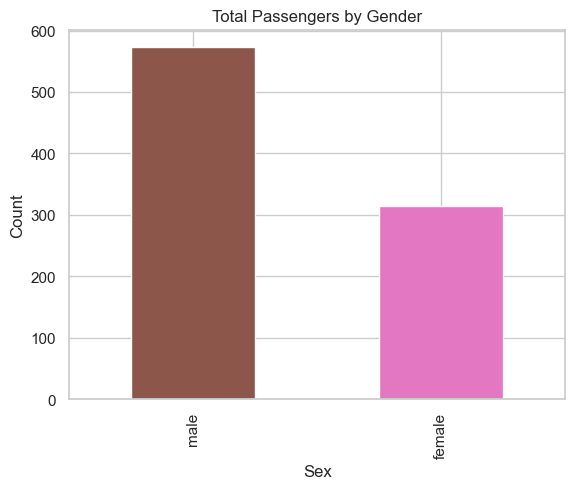

In [87]:
titanic['Sex'].value_counts().plot(kind='bar', color=['#8c564b', '#e377c2'])
plt.title("Total Passengers by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [89]:
#Insight: There were significantly more male passengers than female passengers on the Titanic.

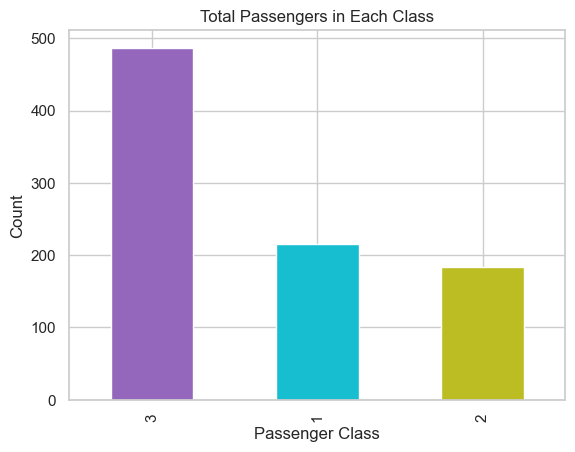

In [91]:
titanic['Pclass'].value_counts().plot(kind='bar', color=['#9467bd', '#17becf', '#bcbd22'])
plt.title("Total Passengers in Each Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

In [93]:
#Insight: The majority of passengers belonged to 3rd class, indicating many were from lower socioeconomic backgrounds.

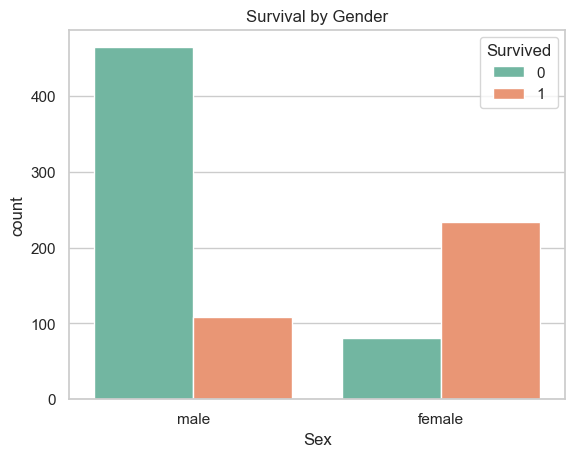

In [95]:
sns.countplot(x='Sex', hue='Survived', data=titanic,palette='Set2')
plt.title("Survival by Gender")
plt.show()

In [97]:
#Insight: Female passengers had a significantly higher survival rate than male passengers.

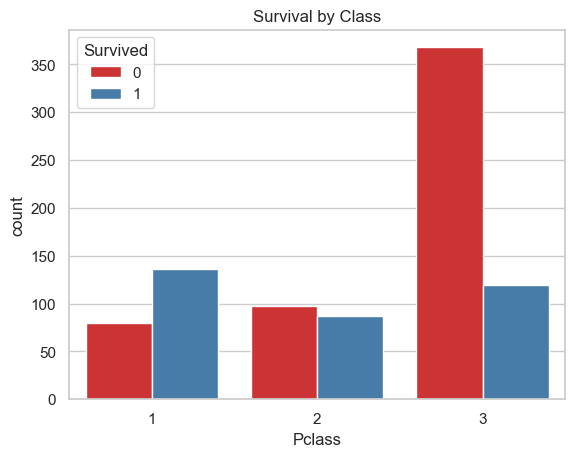

In [99]:
sns.countplot(x='Pclass', hue='Survived', data=titanic, palette='Set1')
plt.title("Survival by Class")
plt.show()

In [101]:
#Insight: Passengers in 1st class had the highest survival rate, while 3rd class had the lowest.

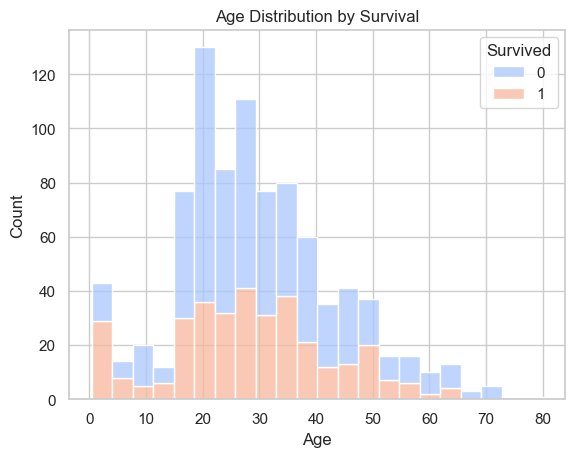

In [103]:
sns.histplot(data=titanic, x='Age', hue='Survived', multiple='stack',palette='coolwarm')
plt.title("Age Distribution by Survival")
plt.show()

In [105]:
#Insight: Children and younger adults had a better survival rate, especially those under 10 years of age.

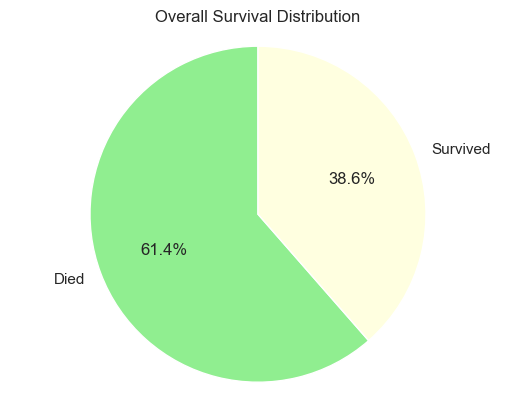

In [107]:
survived_counts = titanic['Survived'].value_counts()
labels = ['Died', 'Survived']
colors = ['lightgreen', 'lightyellow']
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Overall Survival Distribution")
plt.axis('equal')
plt.show()

In [109]:
#Insight: Only about 38.6% of passengers survived the Titanic disaster.

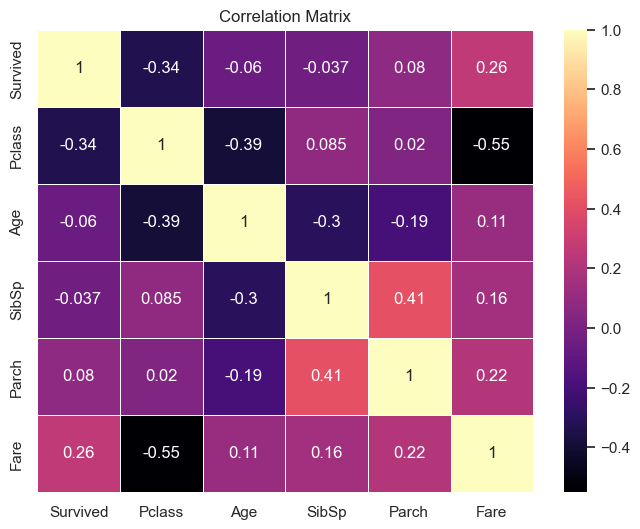

In [111]:
plt.figure(figsize=(8, 6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='magma', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [113]:
#Insight: Fare and Pclass have a strong negative correlation. Survival is moderately positively correlated with Fare and negatively with Pclass.

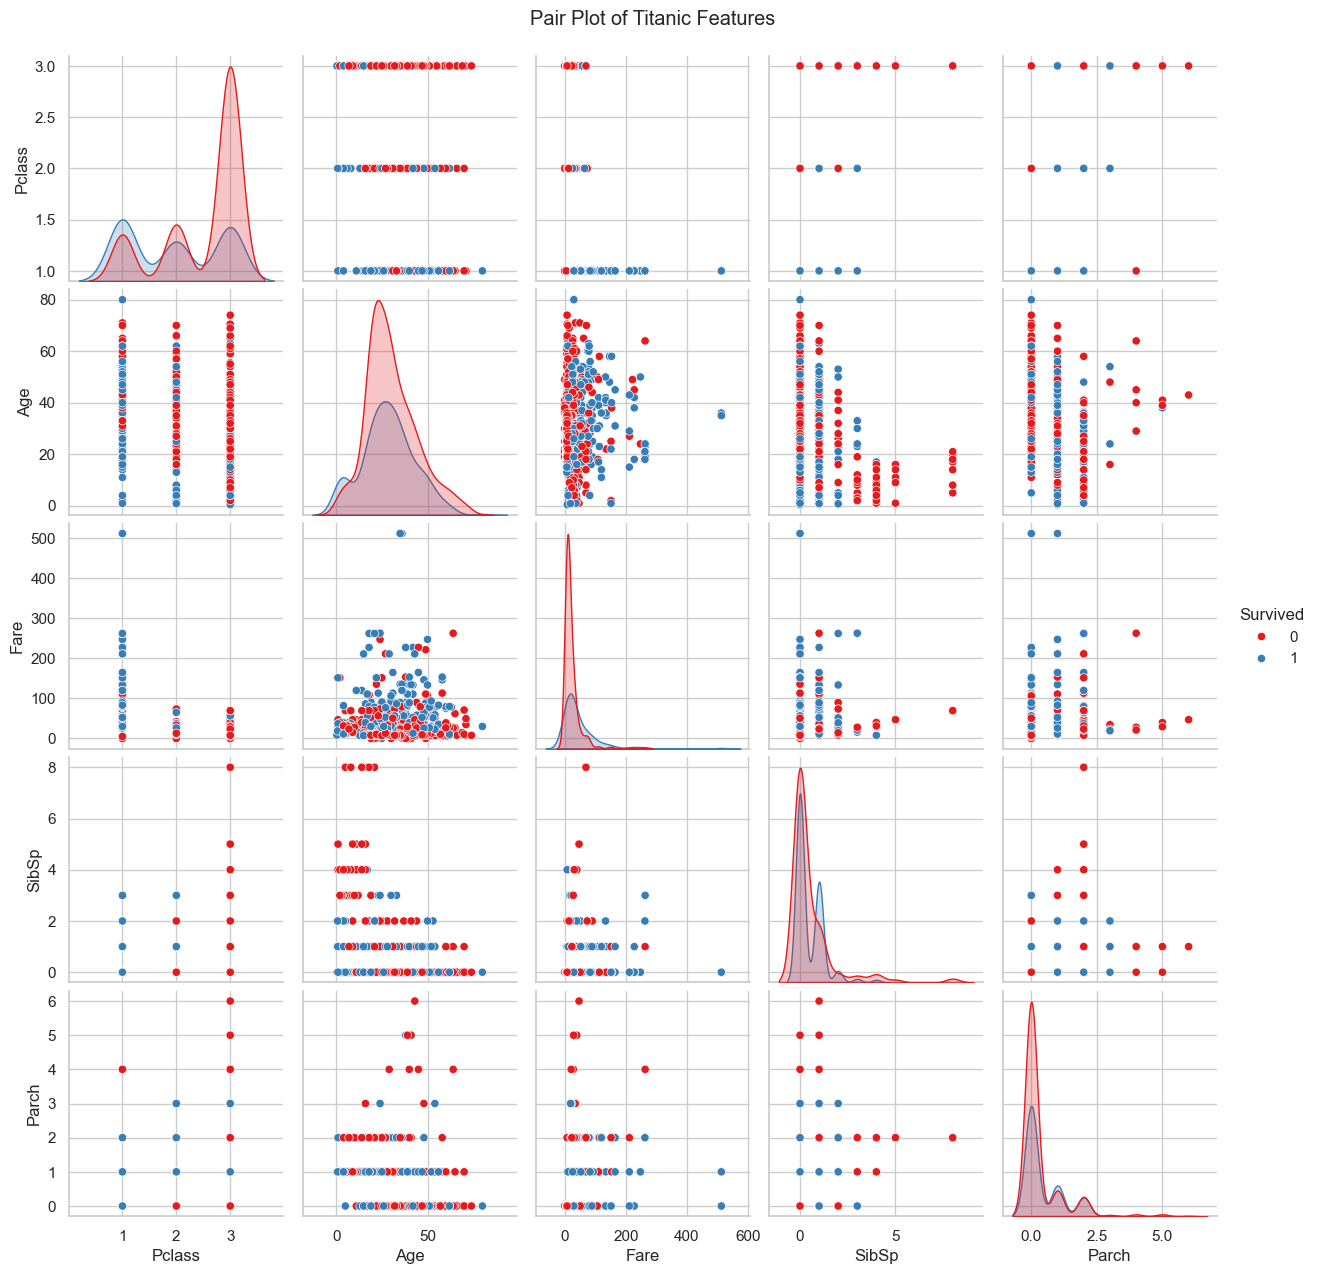

In [129]:
pair_data = titanic[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']]
sns.pairplot(pair_data, hue='Survived', palette='Set1')
plt.suptitle("Pair Plot of Titanic Features", y=1.02)
plt.show()

In [118]:
#Insight: Survivors are more concentrated among passengers with lower family members aboard (SibSp and Parch), higher fare, and first-class tickets.

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = titanic[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].fillna(0)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

KNN Accuracy: 0.6629213483146067
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.73       111
           1       0.56      0.52      0.54        67

    accuracy                           0.66       178
   macro avg       0.64      0.64      0.64       178
weighted avg       0.66      0.66      0.66       178



In [122]:
from sklearn.tree import DecisionTreeClassifier

titanic.rename(columns={
    'Siblings/Spouses Aboard': 'SibSp',
    'Parents/Children Aboard': 'Parch'
}, inplace=True)

X = titanic[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].fillna(0)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6966292134831461
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.92      0.79       111
           1       0.71      0.33      0.45        67

    accuracy                           0.70       178
   macro avg       0.70      0.62      0.62       178
weighted avg       0.70      0.70      0.66       178

